# Stock Sentiment Analysis

# 1. Import Libraries

In [174]:
!pip install wordcloud

# install gensim
!pip install gensim

# NLTK: Natural Language tool kit
!pip install nltk


In [175]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [176]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 

In [177]:
# load the stock news data
stock_df = pd.read_csv(r"C:\Users\Sarira\OneDrive\Documents\Study Material\ML\Coursera\Guided Projects\Stock NLP\stock_sentiment.csv")

In [178]:
# Look at the 10 rows
stock_df.head(10)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend wi...,0
7,Monday's relative weakness. NYX WIN TIE TAP IC...,0
8,GOOG - ower trend line channel test & volume s...,1
9,AAP will watch tomorrow for ONG entry.,1


In [179]:
# dataframe information
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [180]:
# check for null values
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

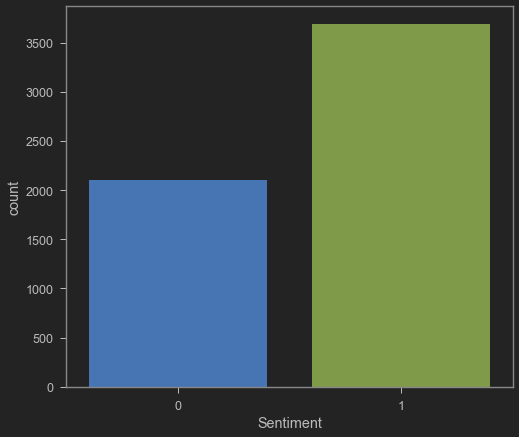

In [181]:
# Display count of each sentiment group
sns.countplot(stock_df['Sentiment'])

# 2. Data Prep


In [182]:
stock_df['Text_lower'] = stock_df['Text'].str.lower()

In [183]:
# Let's define a function to remove punctuations

def removed_punc(text):
    punc_removed = [char for char in text if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)
    return punc_removed_join

In [184]:
# Let's remove punctuations from our dataset 
stock_df['Text_w_punc'] = stock_df['Text_lower'].apply(lambda x : removed_punc(x))

In [185]:
stock_df.head(10)

,Text,Sentiment,Text_lower,Text_w_punc
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...,kickers on my watchlist xide tit soq pnk cpw b...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: aap movie. 55% return for the fea/geed i...,user aap movie 55 return for the feageed indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user i'd be afraid to short amzn - they are lo...,user id be afraid to short amzn they are look...
3,MNTA Over 12.00,1,mnta over 12.00,mnta over 1200
4,OI Over 21.37,1,oi over 21.37,oi over 2137
5,PGNX Over 3.04,1,pgnx over 3.04,pgnx over 304
6,AAP - user if so then the current downtrend wi...,0,aap - user if so then the current downtrend wi...,aap user if so then the current downtrend wil...
7,Monday's relative weakness. NYX WIN TIE TAP IC...,0,monday's relative weakness. nyx win tie tap ic...,mondays relative weakness nyx win tie tap ice ...
8,GOOG - ower trend line channel test & volume s...,1,goog - ower trend line channel test & volume s...,goog ower trend line channel test volume sup...
9,AAP will watch tomorrow for ONG entry.,1,aap will watch tomorrow for ong entry.,aap will watch tomorrow for ong entry


In [186]:
# Obtain additional stopwords from nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'http', 'https'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [187]:
# Remove stopwords and remove short words (less than 2 characters)
def removed_stop(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

In [188]:
# apply removed stop words to the text column
stock_df['Text_w_stop'] = stock_df['Text_w_punc'].apply(lambda x : removed_stop(x))

In [189]:
stock_df.head(10)

,Text,Sentiment,Text_lower,Text_w_punc,Text_w_stop
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...,kickers on my watchlist xide tit soq pnk cpw b...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: aap movie. 55% return for the fea/geed i...,user aap movie 55 return for the feageed indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user i'd be afraid to short amzn - they are lo...,user id be afraid to short amzn they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,mnta over 12.00,mnta over 1200,[mnta]
4,OI Over 21.37,1,oi over 21.37,oi over 2137,[]
5,PGNX Over 3.04,1,pgnx over 3.04,pgnx over 304,[pgnx]
6,AAP - user if so then the current downtrend wi...,0,aap - user if so then the current downtrend wi...,aap user if so then the current downtrend wil...,"[current, downtrend, break, otherwise, shortte..."
7,Monday's relative weakness. NYX WIN TIE TAP IC...,0,monday's relative weakness. nyx win tie tap ic...,mondays relative weakness nyx win tie tap ice ...,"[mondays, relative, weakness, nyx, win, tie, t..."
8,GOOG - ower trend line channel test & volume s...,1,goog - ower trend line channel test & volume s...,goog ower trend line channel test volume sup...,"[goog, ower, trend, line, channel, test, volum..."
9,AAP will watch tomorrow for ONG entry.,1,aap will watch tomorrow for ong entry.,aap will watch tomorrow for ong entry,"[watch, tomorrow, ong, entry]"


In [190]:
stock_df['Text_w_stop'][0]

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [191]:
# join the words into a string
stock_df['Text_processed'] = stock_df['Text_w_stop'].apply(lambda x: ' '.join(x))

In [192]:
stock_df

,Text,Sentiment,Text_lower,Text_w_punc,Text_w_stop,Text_processed
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...,kickers on my watchlist xide tit soq pnk cpw b...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: aap movie. 55% return for the fea/geed i...,user aap movie 55 return for the feageed indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user i'd be afraid to short amzn - they are lo...,user id be afraid to short amzn they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,mnta over 12.00,mnta over 1200,[mnta],mnta
4,OI Over 21.37,1,oi over 21.37,oi over 2137,[],
...,...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,industry body cii said #discoms are likely to ...,industry body cii said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,"#gold prices slip below rs 46,000 as #investor...",gold prices slip below rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,workers at bajaj auto have agreed to a 10% wag...,workers at bajaj auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,"#sharemarket live: sensex off day’s high, up 6...",sharemarket live sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


# Visualization Data

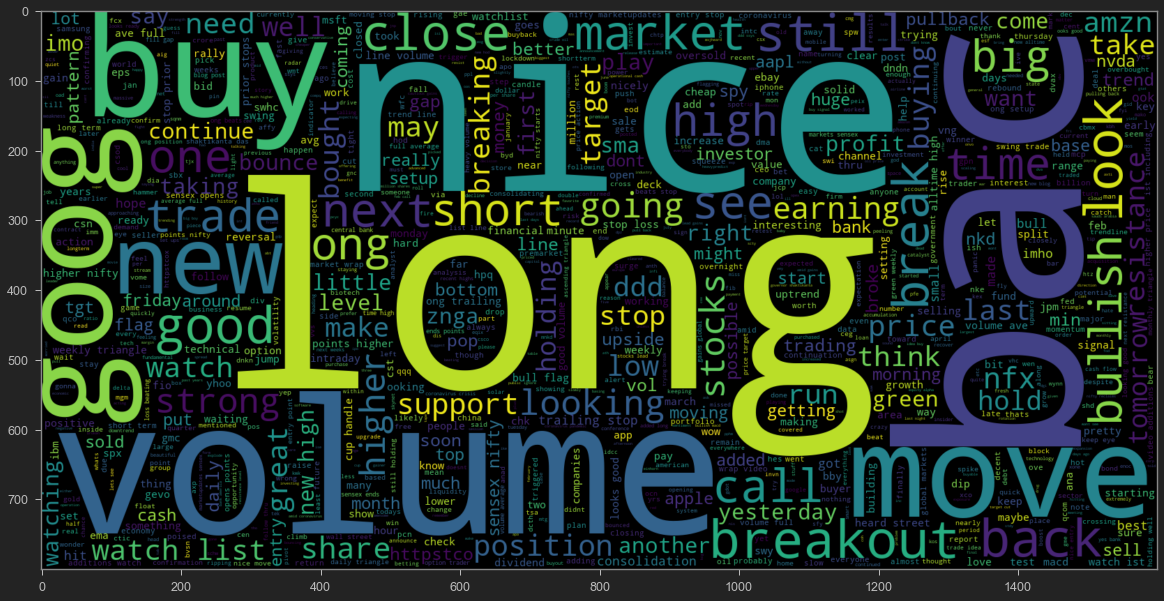

In [193]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000, width = 1600, height = 800 ).generate(" ".join(stock_df[stock_df['Sentiment'] == 1]['Text_processed']))
plt.imshow(wc, interpolation = 'bilinear');

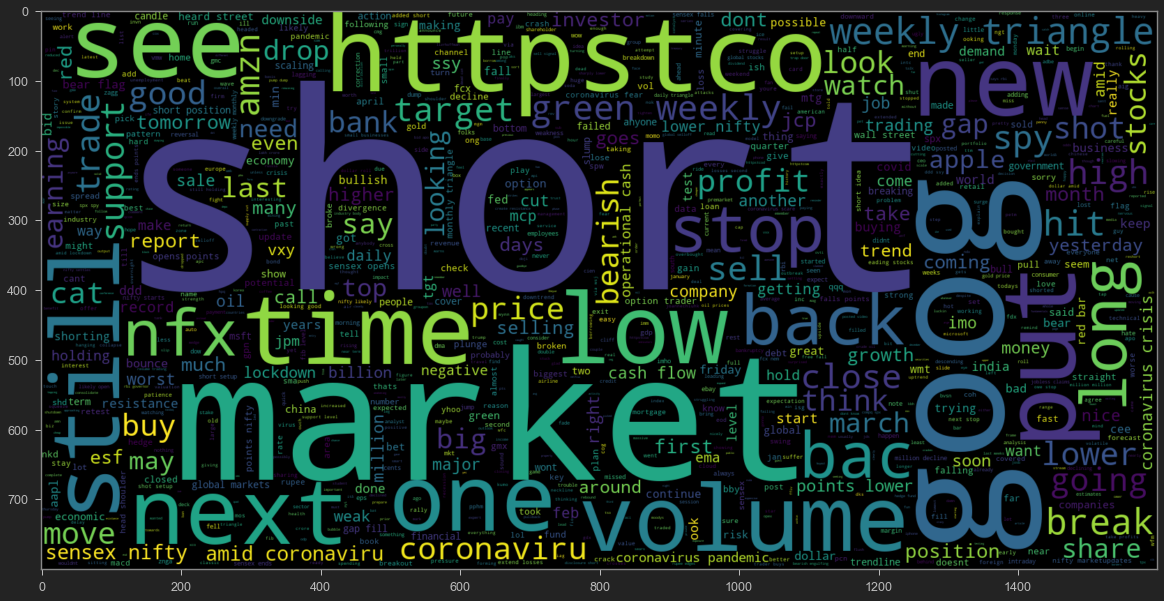

In [194]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000, width = 1600, height = 800 ).generate(" ".join(stock_df[stock_df['Sentiment'] == 0]['Text_processed']))
plt.imshow(wc, interpolation = 'bilinear');

In [195]:
stock_df

,Text,Sentiment,Text_lower,Text_w_punc,Text_w_stop,Text_processed
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...,kickers on my watchlist xide tit soq pnk cpw b...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: aap movie. 55% return for the fea/geed i...,user aap movie 55 return for the feageed indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user i'd be afraid to short amzn - they are lo...,user id be afraid to short amzn they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,mnta over 12.00,mnta over 1200,[mnta],mnta
4,OI Over 21.37,1,oi over 21.37,oi over 2137,[],
...,...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,industry body cii said #discoms are likely to ...,industry body cii said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,"#gold prices slip below rs 46,000 as #investor...",gold prices slip below rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,workers at bajaj auto have agreed to a 10% wag...,workers at bajaj auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,"#sharemarket live: sensex off day’s high, up 6...",sharemarket live sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


In [196]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [197]:
stock_df['final_text'] = [list(set(nltk.word_tokenize(x))) for x in stock_df['Text_processed']]
stock_df['tweets_length'] = [ len(nltk.word_tokenize(x)) for x in stock_df['Text_processed'] ]
stock_df.head(10)

,Text,Sentiment,Text_lower,Text_w_punc,Text_w_stop,Text_processed,final_text,tweets_length
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...,kickers on my watchlist xide tit soq pnk cpw b...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...,"[bpz, method, posts, cpw, soq, watchlist, tit,...",14
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: aap movie. 55% return for the fea/geed i...,user aap movie 55 return for the feageed indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome,"[return, awesome, movie, trades, indicator, fe...",6
2,user I'd be afraid to short AMZN - they are lo...,1,user i'd be afraid to short amzn - they are lo...,user id be afraid to short amzn they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...,"[afraid, ebooks, nearmonopoly, amzn, looking, ...",7
3,MNTA Over 12.00,1,mnta over 12.00,mnta over 1200,[mnta],mnta,[mnta],1
4,OI Over 21.37,1,oi over 21.37,oi over 2137,[],,[],0
5,PGNX Over 3.04,1,pgnx over 3.04,pgnx over 304,[pgnx],pgnx,[pgnx],1
6,AAP - user if so then the current downtrend wi...,0,aap - user if so then the current downtrend wi...,aap user if so then the current downtrend wil...,"[current, downtrend, break, otherwise, shortte...",current downtrend break otherwise shortterm co...,"[break, downtrend, correction, medterm, curren...",8
7,Monday's relative weakness. NYX WIN TIE TAP IC...,0,monday's relative weakness. nyx win tie tap ic...,mondays relative weakness nyx win tie tap ice ...,"[mondays, relative, weakness, nyx, win, tie, t...",mondays relative weakness nyx win tie tap ice ...,"[bmc, win, relative, nyx, aon, chk, ice, monda...",13
8,GOOG - ower trend line channel test & volume s...,1,goog - ower trend line channel test & volume s...,goog ower trend line channel test volume sup...,"[goog, ower, trend, line, channel, test, volum...",goog ower trend line channel test volume support,"[channel, ower, goog, support, volume, trend, ...",8
9,AAP will watch tomorrow for ONG entry.,1,aap will watch tomorrow for ong entry.,aap will watch tomorrow for ong entry,"[watch, tomorrow, ong, entry]",watch tomorrow ong entry,"[entry, tomorrow, watch, ong]",4


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

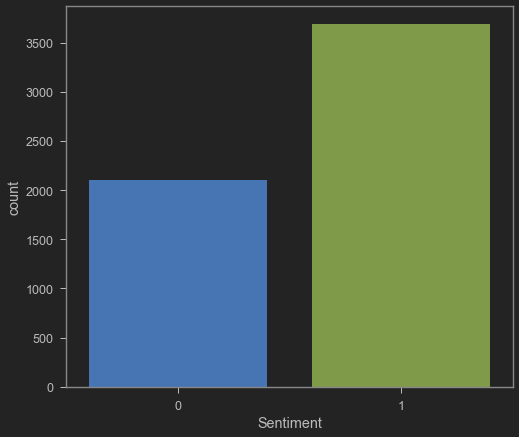

In [198]:
sns.countplot(stock_df['Sentiment'])

# TASK #7: PREPARE THE DATA BY TOKENIZING AND PADDING

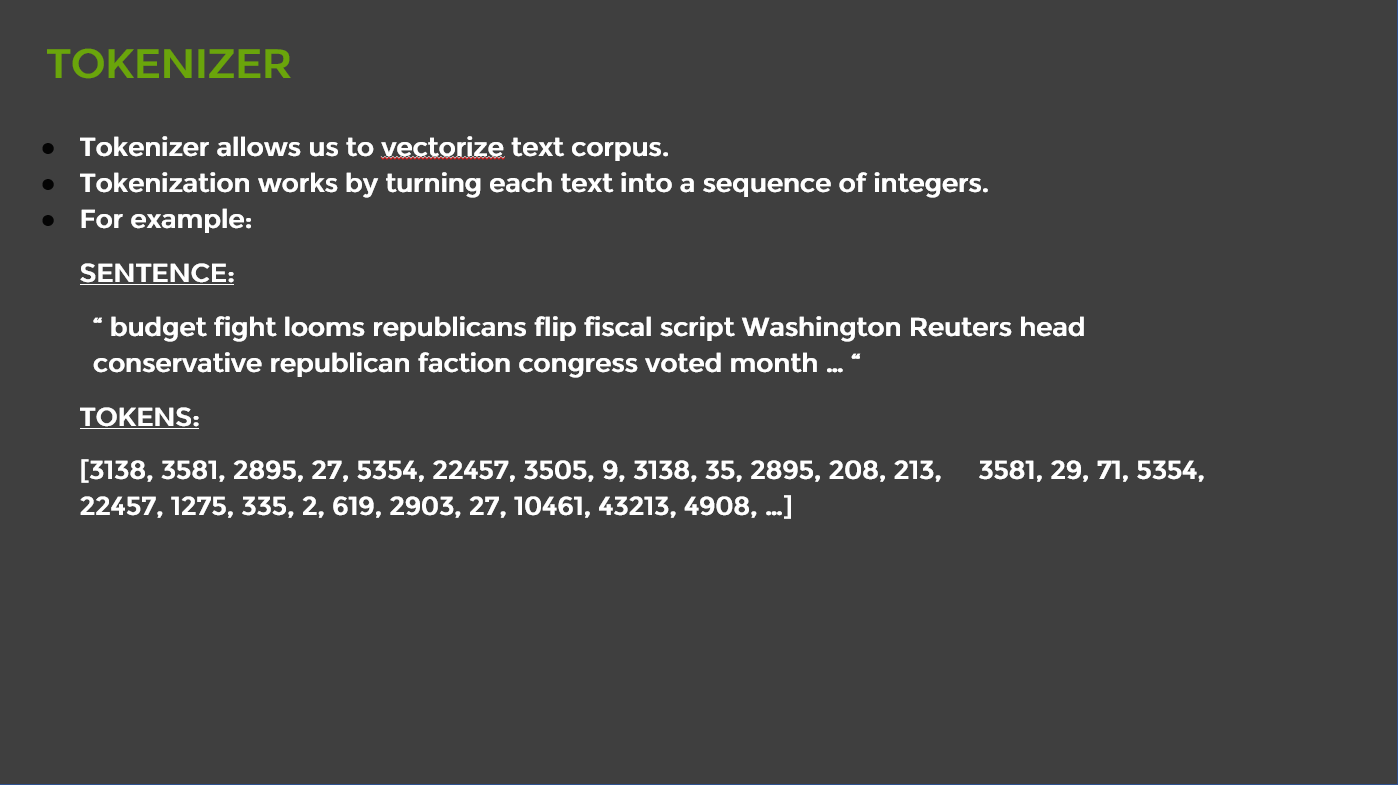

In [199]:
stock_df

,Text,Sentiment,Text_lower,Text_w_punc,Text_w_stop,Text_processed,final_text,tweets_length
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...,kickers on my watchlist xide tit soq pnk cpw b...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...,"[bpz, method, posts, cpw, soq, watchlist, tit,...",14
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: aap movie. 55% return for the fea/geed i...,user aap movie 55 return for the feageed indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome,"[return, awesome, movie, trades, indicator, fe...",6
2,user I'd be afraid to short AMZN - they are lo...,1,user i'd be afraid to short amzn - they are lo...,user id be afraid to short amzn they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...,"[afraid, ebooks, nearmonopoly, amzn, looking, ...",7
3,MNTA Over 12.00,1,mnta over 12.00,mnta over 1200,[mnta],mnta,[mnta],1
4,OI Over 21.37,1,oi over 21.37,oi over 2137,[],,[],0
...,...,...,...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,industry body cii said #discoms are likely to ...,industry body cii said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...,"[discoms, said, net, cii, industry, body, like...",14
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,"#gold prices slip below rs 46,000 as #investor...",gold prices slip below rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...,"[book, investors, fears, profits, coronavirusl...",10
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,workers at bajaj auto have agreed to a 10% wag...,workers at bajaj auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...,"[auto, period, wage, lockdown, till, workers, ...",11
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,"#sharemarket live: sensex off day’s high, up 6...",sharemarket live sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...,"[sensex, stocks, xgtlrokui, high, lead, privat...",14


In [200]:
X = stock_df['final_text']
y = stock_df['Sentiment']
print(X)
print(y)

0       [bpz, method, posts, cpw, soq, watchlist, tit,...
1       [return, awesome, movie, trades, indicator, fe...
2       [afraid, ebooks, nearmonopoly, amzn, looking, ...
3                                                  [mnta]
4                                                      []
                              ...                        
5786    [discoms, said, net, cii, industry, body, like...
5787    [book, investors, fears, profits, coronavirusl...
5788    [auto, period, wage, lockdown, till, workers, ...
5789    [sensex, stocks, xgtlrokui, high, lead, privat...
5790    [sensex, driving, dstreet, climb, still, key, ...
Name: final_text, Length: 5791, dtype: object
0       1
1       1
2       1
3       1
4       1
       ..
5786    0
5787    0
5788    1
5789    1
5790    1
Name: Sentiment, Length: 5791, dtype: int64


In [201]:
# split the data into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [202]:
X_train.shape

(5211,)

In [203]:
X_test.shape

(580,)

In [204]:
X_train

3647                     [little, mng, managed, job, yes]
3860    [tommorrow, heavy, shoing, monday, csn, real, ...
3001    [goog, experience, business, hangouts, everyda...
1674    [hcg, bearish, ayi, becn, patternibt, engulfin...
3277    [turning, buying, vmc, macd, mil, oversoldemc,...
                              ...                        
4965    [resistance, body, breakout, trend, weekly, line]
5373    [changes, reassessment, pandemic, supply, one,...
1964    [time, stop, playing, breakout, back, highs, e...
5659    [covid, oim, fight, diesel, petrol, nzj, litre...
5554    [loan, unlikely, interest, later, charge, http...
Name: final_text, Length: 5211, dtype: object

In [205]:
# Obtain the total number of unique words
total_words = len(list(set(stock_df['Text_processed'])))
total_words

5692

In [206]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)


In [207]:
train_sequences

[[110, 3586, 3587, 1292, 425],
 [3588, 360, 3589, 314, 361, 514, 24, 11, 473, 130, 38],
 [9, 2434, 362, 3590, 3591, 952, 74],
 [3592, 111, 1522, 2435, 3593, 848, 315, 3594, 692, 3595, 3596, 953],
 [591, 72, 2436, 168, 954, 3597, 849, 474, 636, 140],
 [8, 227, 275, 286, 15, 243],
 [1523, 106, 276, 3598, 3599, 401, 3600, 3601, 1524, 2437, 3602],
 [31, 220, 3603, 48, 637, 50, 46, 41, 39, 90, 3604],
 [37, 131, 955, 256, 153, 3605, 1105, 475],
 [1293, 3606, 3607, 3608, 177, 3609, 3610, 17, 233, 363, 1855],
 [1525, 956, 135, 402, 2438, 32, 1856, 1294],
 [80, 95, 758],
 [1857, 3611, 2439],
 [1526, 2440, 1295, 73, 13, 1858, 476, 1527, 957, 147, 337, 473],
 [2441, 141, 169, 2442, 42, 759, 2443, 477, 88, 43, 1859, 760, 693, 40],
 [2444, 120, 10],
 [220, 761, 265, 12, 18, 100, 136, 3, 1860, 75],
 [958,
  2445,
  426,
  185,
  1861,
  1106,
  1528,
  3612,
  234,
  1296,
  2446,
  3613,
  3614,
  93],
 [2447, 1529, 3615, 1297, 96, 50, 3616, 850, 228, 959],
 [403, 364, 316, 48, 73, 186, 515, 163, 4

In [208]:
test_sequences

[[757, 320, 65, 867, 178, 464],
 [570, 114],
 [57, 2108, 33, 223, 1],
 [1447, 346, 314, 8, 26, 2, 206, 45, 1137, 422],
 [67, 509, 1254, 397],
 [128, 889, 328, 390, 336],
 [1311, 73, 1008, 18, 13, 2842, 899, 1428, 1346],
 [74, 348, 5, 1891, 2239, 1, 1595, 4],
 [55, 1435, 4986, 2290, 639],
 [31, 59, 1352, 221, 2327, 1437, 39],
 [80, 692],
 [67, 61, 192, 1830, 2141, 236, 7, 124, 674],
 [1498, 318, 40],
 [3582, 3102, 1275, 568],
 [920, 532, 20, 3478, 66, 1327],
 [404, 22, 3202, 178, 77, 194],
 [9, 56, 20, 101, 1, 686, 863, 543],
 [325, 1494, 175],
 [1170, 53, 19, 191, 91, 2873, 120, 47, 51, 1903, 226, 74],
 [128, 164, 2983, 1008, 210, 140, 1085, 278, 42, 1045, 856],
 [1068, 10, 175, 1074, 294],
 [635, 1824, 164, 12, 885, 745, 113, 679, 1102],
 [199, 1769, 62, 407, 807, 2617, 3461, 819, 23, 297, 85, 1467, 2274],
 [120, 27, 9, 1131],
 [254, 1928, 3833],
 [1676, 227, 35, 2, 760, 42],
 [73, 1414, 176, 266, 382, 115, 277],
 [1147, 128, 346, 1844, 942, 13, 4],
 [4727, 1936, 2003, 152, 1553, 3048

In [209]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 3860    [tommorrow, heavy, shoing, monday, csn, real, ...
Name: final_text, dtype: object 
 is:  [3588, 360, 3589, 314, 361, 514, 24, 11, 473, 130, 38]


In [210]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 15, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 15, truncating = 'post')

In [211]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [ 110 3586 3587 1292  425    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 2  is: [3588  360 3589  314  361  514   24   11  473  130   38    0    0    0
    0]
The padded encoding for document: 3  is: [   9 2434  362 3590 3591  952   74    0    0    0    0    0    0    0
    0]


In [212]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [213]:
y_train_cat.shape

(5211, 2)

In [214]:
y_test_cat.shape

(580, 2)

In [215]:
y_train_cat

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [216]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 20, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 20, truncating = 'post')

# Modeling

In [217]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 512)         2914304   
                                                                 
 lstm_2 (LSTM)               (None, 256)               787456    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 3,734,914
Trainable params: 3,734,914
Non-trainable params: 0
_________________________________________________________________


In [218]:
# train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 2)

Epoch 1/2
131/131 [==============================] - 34s 238ms/step - loss: 0.6210 - acc: 0.6624 - val_loss: 0.5558 - val_acc: 0.7143
Epoch 2/2
131/131 [==============================] - 30s 231ms/step - loss: 0.3675 - acc: 0.8565 - val_loss: 0.5233 - val_acc: 0.7795


# Evaluation

In [224]:
# make prediction
pred = model.predict(padded_test)

In [225]:
# make prediction
prediction = []
for i in pred:
    prediction.append(np.argmax(i))

In [226]:
# list containing original values
original = []
for i in y_test_cat:
    original.append(np.argmax(i))

In [222]:
# acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.6603448275862069

<AxesSubplot:>

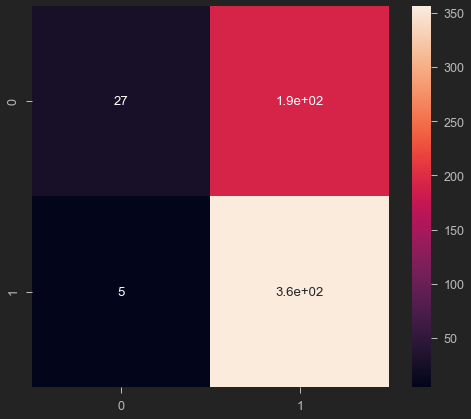

In [227]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)